In [ ]:
#first our randomforest will be run to tell us if transformed values work better


In [56]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt

In [57]:
pd.options.display.max_columns = None

In [58]:
df = pd.read_csv('ML-Project-PoliMi/data/model.csv')

In [59]:
df.columns = [col.strip() for col in df.columns]

In [60]:
dummy = pd.concat([pd.get_dummies(df.product_category).astype(int),pd.get_dummies(df.day).astype(int)],axis=1)

In [61]:
df = pd.concat([df,dummy],axis=1)

In [62]:
df = df[list(df.dtypes[df.dtypes!=object].index)]

In [63]:
y_svd = df.shares

In [64]:
y = np.log(df.shares)

In [65]:
del df['shares']

In [66]:
from sklearn.pipeline import make_pipeline

In [67]:
X = df.copy()

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
import numpy as np

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [72]:

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.8,
                                                    random_state=42)

In [24]:
from sklearn.model_selection import GridSearchCV
import math

def gs_regression(model, par) :
    #gs = GridSearchCV(model, par,cv=5,scoring ='neg_mean_absolute_error')
    gs = GridSearchCV(model, par,cv=3,scoring ='neg_mean_absolute_error') 
    gs = gs.fit(X_train,y_train)

    #summarize the results of your GRIDSEARCH
    print('***GRIDSEARCH RESULTS***')
    print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    
    y_pred_train=gs.predict(X_train)
    y_pred_test=gs.predict(X_test) 
    
    y_train_exp=np.exp(y_train)
    y_test_exp=np.exp(y_test)
    y_pred_train_exp=np.exp(y_pred_train)
    y_pred_test_exp=np.exp(y_pred_test)
    
            
    from sklearn import metrics
    print()
    print("MAE  train %.3f (%f)  test %.3f (%f)" % (metrics.mean_absolute_error(y_train, y_pred_train), metrics.mean_absolute_error(y_train_exp, y_pred_train_exp) ,metrics.mean_absolute_error(y_test, y_pred_test),  metrics.mean_absolute_error(y_test_exp, y_pred_test_exp)  ) )
    print("MSE  train %.3f              test %.3f" % (metrics.mean_squared_error(y_train, y_pred_train), metrics.mean_squared_error(y_test, y_pred_test)) ) 
    print("RMSE train %.3f              test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) ) 
    print("r2   train %.3f              test %.3f" % (metrics.r2_score(y_train, y_pred_train), metrics.r2_score(y_test, y_pred_test)) )
    return gs

In [33]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression() 
parameters = {}

gs_lin = gs_regression(lin, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.638315 using {}
-0.638315 (0.010200) with: {}

MAE  train 0.637 (2420.731865)  test 0.638 (2419.144045)
MSE  train 0.744              test 0.737
RMSE train 0.863              test 0.858
r2   train 0.139              test 0.130


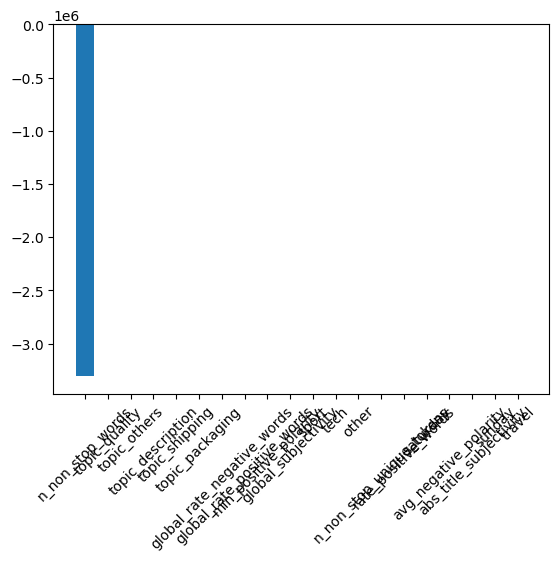

In [34]:
reg_lin = gs_lin.best_estimator_
plt.bar(x= X_train.columns[np.abs(reg_lin.coef_).argsort()[::-1][0:20]],height = reg_lin.coef_[np.abs(reg_lin.coef_).argsort()[::-1][0:20]])
plt.xticks(rotation= 45)
plt.show()

In [35]:
from sklearn.linear_model import Ridge

rdg = Ridge()
parameters = {"alpha": [0.001,0.01,0.025,0.1,1,10,25,100]}#, "normalize": [True, False]}

gs_rdg = gs_regression(rdg, parameters)

C:\Users\zsand\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.5779e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\zsand\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.64088e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\zsand\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.55321e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\zsand\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.45884e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\zsand\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211

***GRIDSEARCH RESULTS***
Best score: -0.638244 using {'alpha': 10}
-0.638284 (0.010101) with: {'alpha': 0.001}
-0.638283 (0.010102) with: {'alpha': 0.01}
-0.638281 (0.010103) with: {'alpha': 0.025}
-0.638277 (0.010106) with: {'alpha': 0.1}
-0.638258 (0.010128) with: {'alpha': 1}
-0.638244 (0.010138) with: {'alpha': 10}
-0.638301 (0.010108) with: {'alpha': 25}
-0.638697 (0.009999) with: {'alpha': 100}

MAE  train 0.637 (2420.821198)  test 0.638 (2418.905395)
MSE  train 0.744              test 0.737
RMSE train 0.863              test 0.858
r2   train 0.139              test 0.130


In [38]:
gs_rdg.best_estimator_.get_params()

{'alpha': 10,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

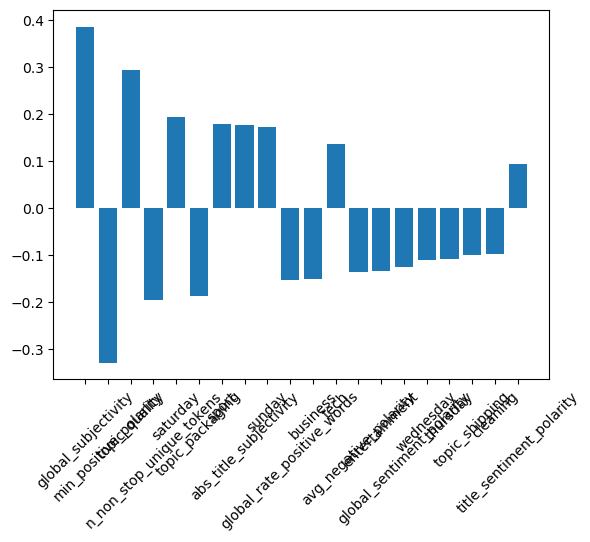

In [49]:
ordrd = np.argsort(np.abs(gs_rdg.best_estimator_.coef_))[::-1]
plt.bar(height = gs_rdg.best_estimator_.coef_[ordrd[0:20]], x = X_train.columns[ordrd[0:20]])
plt.xticks(rotation=45)
plt.show()

In [50]:
from sklearn.linear_model import Lasso

regressor = Lasso()
parameters = {"alpha": [0.001,0.01,0.025,0.1,1,10,25,100]}#, "normalize": [True, False]}

gs_lasso = gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.638924 using {'alpha': 0.001}
-0.638924 (0.009891) with: {'alpha': 0.001}
-0.648307 (0.009944) with: {'alpha': 0.01}
-0.658084 (0.009991) with: {'alpha': 0.025}
-0.661092 (0.009769) with: {'alpha': 0.1}
-0.661829 (0.009838) with: {'alpha': 1}
-0.663999 (0.010624) with: {'alpha': 10}
-0.667963 (0.011122) with: {'alpha': 25}
-0.681267 (0.011225) with: {'alpha': 100}

MAE  train 0.637 (2423.350777)  test 0.638 (2420.612994)
MSE  train 0.746              test 0.737
RMSE train 0.863              test 0.859
r2   train 0.137              test 0.129


In [51]:
gs_lasso.best_estimator_.get_params()

{'alpha': 0.001,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

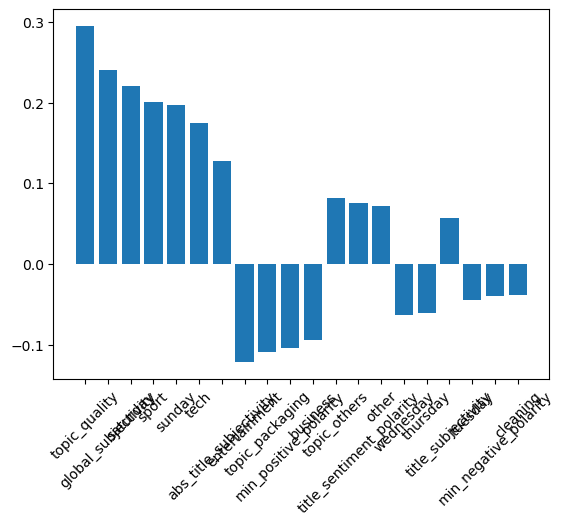

In [52]:
ordrd = np.argsort(np.abs(gs_lasso.best_estimator_.coef_))[::-1]
plt.bar(height = gs_lasso.best_estimator_.coef_[ordrd[0:20]], x = X_train.columns[ordrd[0:20]])
plt.xticks(rotation=45)
plt.show()

In [99]:
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor()
parameters = {"max_depth":[6,9,12,15], 
              "min_samples_leaf": [20,30,40] 
             }

gs_dt = gs_regression(regressor, parameters)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 6)

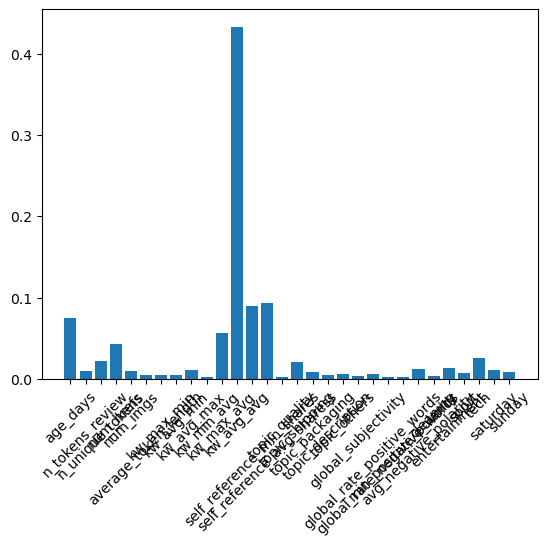

In [58]:
plt.bar(height= gs_dt.best_estimator_.feature_importances_[gs_dt.best_estimator_.feature_importances_>0], x = X_train.columns[gs_dt.best_estimator_.feature_importances_>0])
plt.xticks(rotation=45)
plt.show()

#ill clean it up later

In [32]:
from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor()

#parameters = {'min_samples_leaf':[10,25,50],
#          'max_depth':[8,12,16],
#          'n_estimators':[50,100,150]}
parameters = {'max_depth':[12], 'n_estimators':[10]}

gs_rf = gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.688143 using {'max_depth': 12, 'n_estimators': 10}
-0.688143 (0.011510) with: {'max_depth': 12, 'n_estimators': 10}

MAE  train 0.442 (1973.872478)  test 0.662 (2437.982490)
MSE  train 0.333              test 0.788
RMSE train 0.577              test 0.888
r2   train 0.638              test 0.069


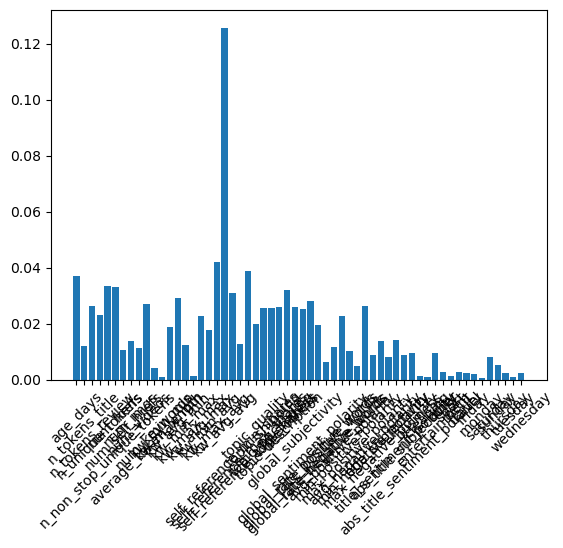

In [33]:
plt.bar(height= gs_rf.best_estimator_.feature_importances_[gs_rf.best_estimator_.feature_importances_>0], x = X_train.columns[gs_rf.best_estimator_.feature_importances_>0])
plt.xticks(rotation=45)
plt.show()

#ill clean it up later

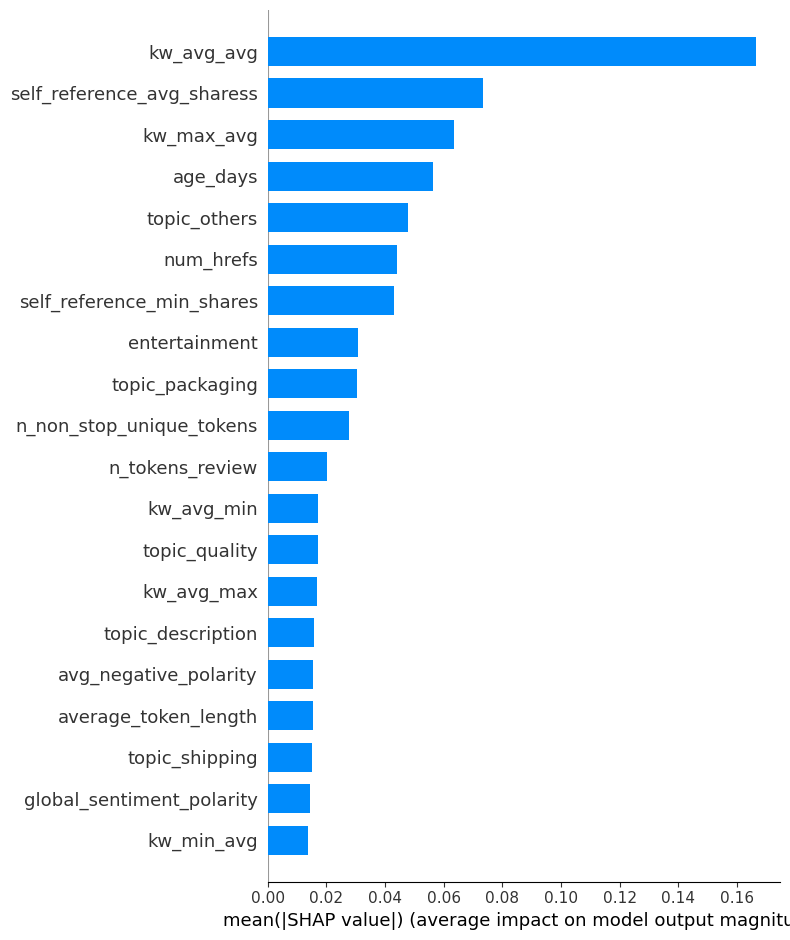

In [75]:
import shap  

shap.initjs()
categorical_features = dummy.columns

mdl = gs_rf.best_estimator_

explainer_rf = shap.TreeExplainer(mdl, feature_names=X_train.columns)
shap_values = explainer_rf.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar")

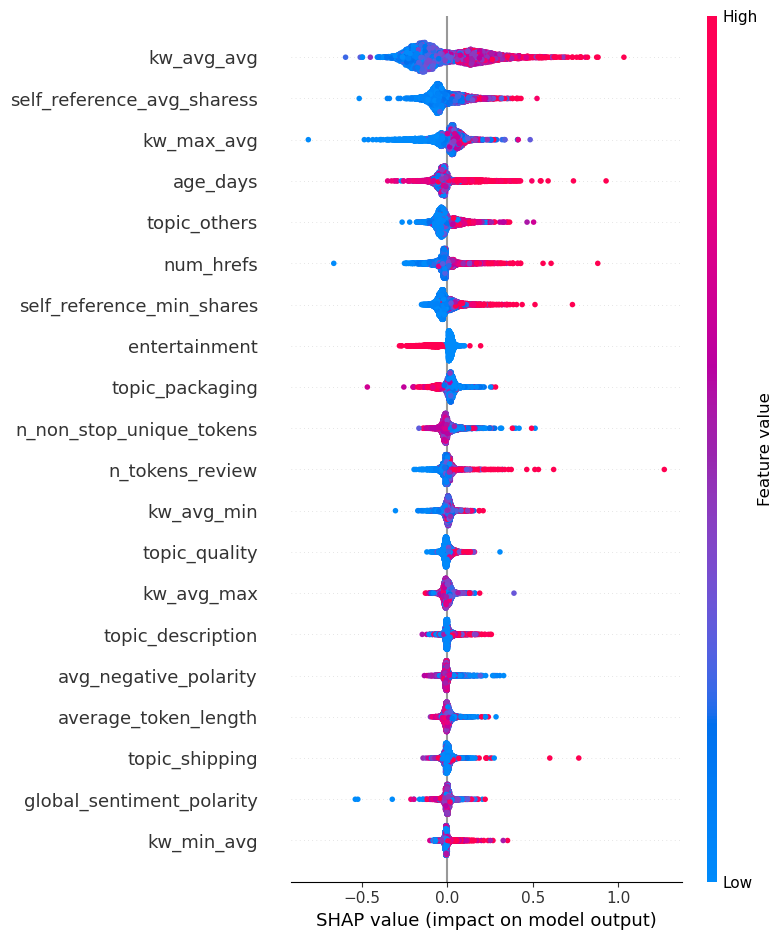

In [76]:
shap.summary_plot(shap_values, X_train)

In [88]:

i = np.argsort(np.array(gs_rf.best_estimator_.predict(X_train)) - np.array(y_train))[::-1][0]
expected_value = shap_values[i,-1]

shap.force_plot(expected_value, shap_values[i,:], X_train.iloc[i,:])


In [89]:

i = np.argsort(np.array(gs_rf.best_estimator_.predict(X_train)) - np.array(y_train))[::-1][1]
expected_value = shap_values[i,-1]

shap.force_plot(expected_value, shap_values[i,:], X_train.iloc[i,:])


In [90]:

i = np.argsort(np.array(gs_rf.best_estimator_.predict(X_train)) - np.array(y_train))[::-1][2]
expected_value = shap_values[i,-1]

shap.force_plot(expected_value, shap_values[i,:], X_train.iloc[i,:])


In [ ]:
from sklearn.neural_network import MLPRegressor


regressor = MLPRegressor(random_state=0)
#parameters = {'hidden_layer_sizes': [(10, 5), (20,10,5)],
#              'solver' : ['sgd'],
#              'batch_size': [20],
#              'learning_rate' : ['constant'],
#              'alpha':10.0 ** -np.arange(1, 3),
#              'max_iter':[5000]}

parameters = {'hidden_layer_sizes':[(5)],
             'max_iter':[12]}
gs_mlp = gs_regression(regressor, parameters)

# FUCK THIS ONE, PLEASE HELP LOL


In [ ]:
import shap  

shap.initjs()
categorical_features = dummy.columns

mdl = gs_mlp.best_estimator_

explainer_rf = shap.DeepExplainer(mdl, feature_names=X_train.columns)
shap_values = explainer_rf.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values, X_train)

In [105]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

base1=DecisionTreeRegressor(max_depth=2)
base2=DecisionTreeRegressor(max_depth=3)

regressor = AdaBoostRegressor()

#parameters = {"n_estimators":[50,75], "base_estimator": [base1,base2], 
#              "learning_rate":[0.2,0.8,1.0,1.2], "random_state" : [4]}

parameters = {"n_estimators":[5], "base_estimator": [base1], 
              "learning_rate":[0.1], "random_state" : [4]}

gs_ada = gs_regression(regressor, parameters)

C:\Users\zsand\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\zsand\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\zsand\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\zsand\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


***GRIDSEARCH RESULTS***
Best score: -0.690414 using {'base_estimator': DecisionTreeRegressor(max_depth=2), 'learning_rate': 0.1, 'n_estimators': 5, 'random_state': 4}
-0.690414 (0.017210) with: {'base_estimator': DecisionTreeRegressor(max_depth=2), 'learning_rate': 0.1, 'n_estimators': 5, 'random_state': 4}

MAE  train 0.688 (2688.234316)  test 0.670 (2404.648162)
MSE  train 0.831              test 0.773
RMSE train 0.911              test 0.879
r2   train 0.096              test 0.086


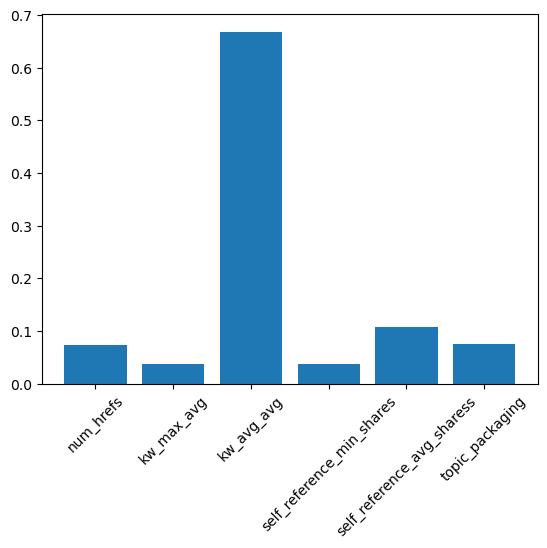

In [114]:
plt.bar(height= gs_ada.best_estimator_.feature_importances_[gs_ada.best_estimator_.feature_importances_>0], x = X_train.columns[gs_ada.best_estimator_.feature_importances_>0])
plt.xticks(rotation=45)
plt.show()

#ill clean it up later

In [107]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor() 
#parameters = {"n_estimators":[20,50,100], "learning_rate":[0.01, 0.1,1,10], 
#              "random_state" : [10] ,
#             "max_depth":[1,2]}

parameters = {'n_estimators':[10]}

gs_xg = gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.681596 using {'n_estimators': 10}
-0.681596 (0.013140) with: {'n_estimators': 10}

MAE  train 0.671 (2653.726920)  test 0.659 (2379.123662)
MSE  train 0.809              test 0.762
RMSE train 0.900              test 0.873
r2   train 0.119              test 0.100


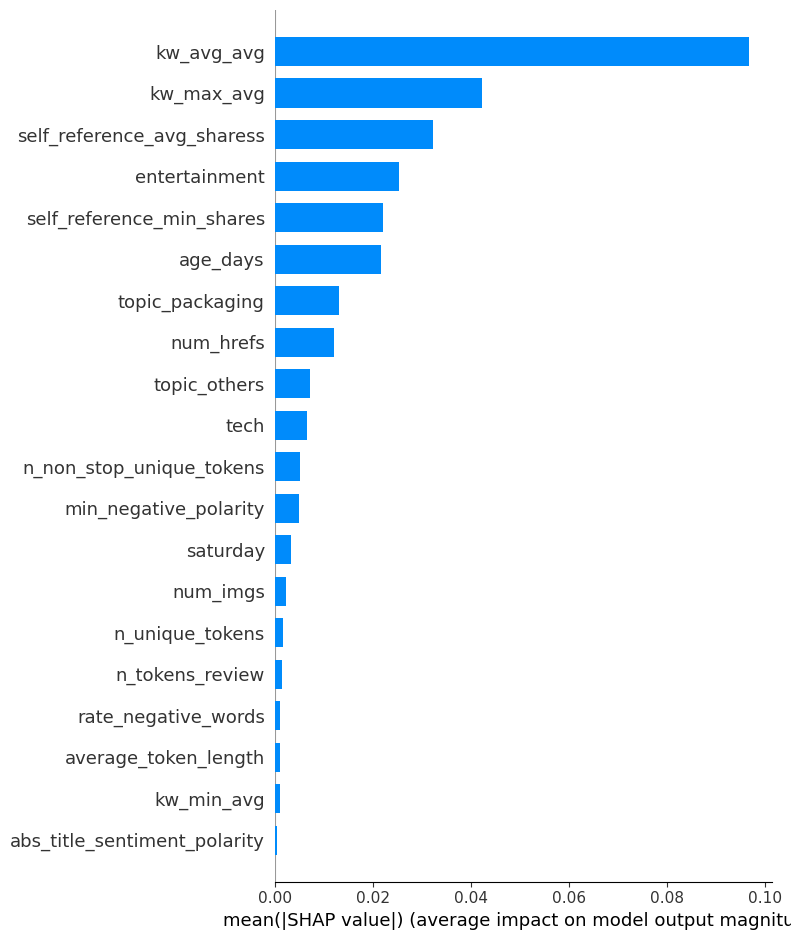

In [108]:
import shap  

shap.initjs()
categorical_features = dummy.columns

mdl = gs_xg.best_estimator_

explainer_rf = shap.TreeExplainer(mdl, feature_names=X_train.columns)
shap_values = explainer_rf.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar")

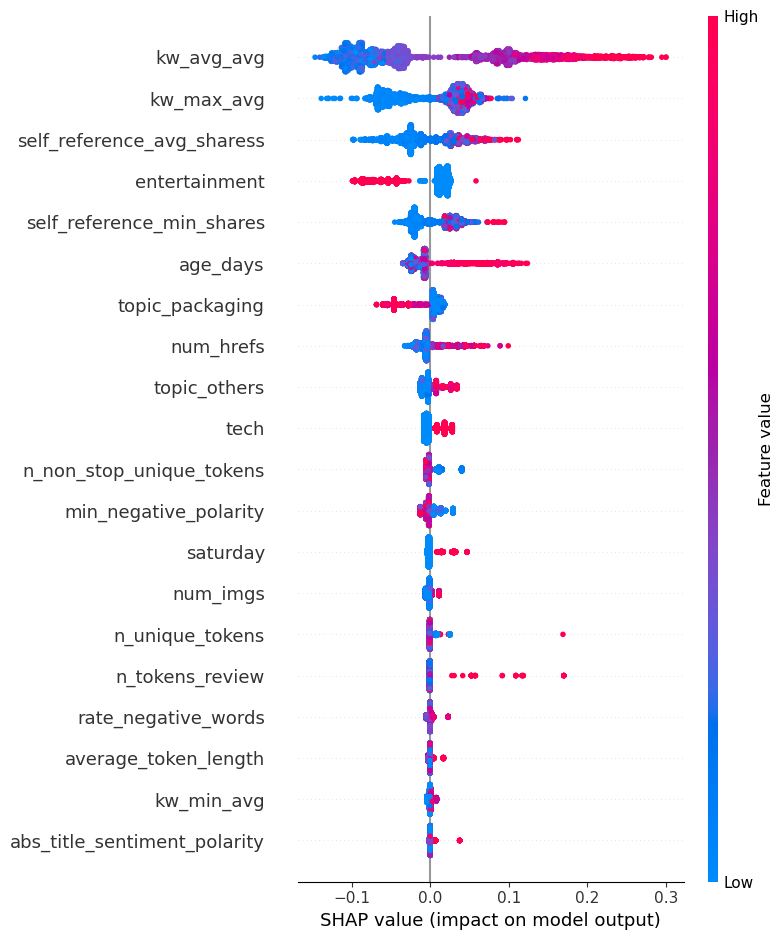

In [109]:
shap.summary_plot(shap_values, X_train)

In [110]:

i = np.argsort(np.array(gs_rf.best_estimator_.predict(X_train)) - np.array(y_train))[::-1][0]
expected_value = shap_values[i,-1]

shap.force_plot(expected_value, shap_values[i,:], X_train.iloc[i,:])


In [111]:

i = np.argsort(np.array(gs_rf.best_estimator_.predict(X_train)) - np.array(y_train))[::-1][1]
expected_value = shap_values[i,-1]

shap.force_plot(expected_value, shap_values[i,:], X_train.iloc[i,:])


In [112]:

i = np.argsort(np.array(gs_rf.best_estimator_.predict(X_train)) - np.array(y_train))[::-1][2]
expected_value = shap_values[i,-1]

shap.force_plot(expected_value, shap_values[i,:], X_train.iloc[i,:])
